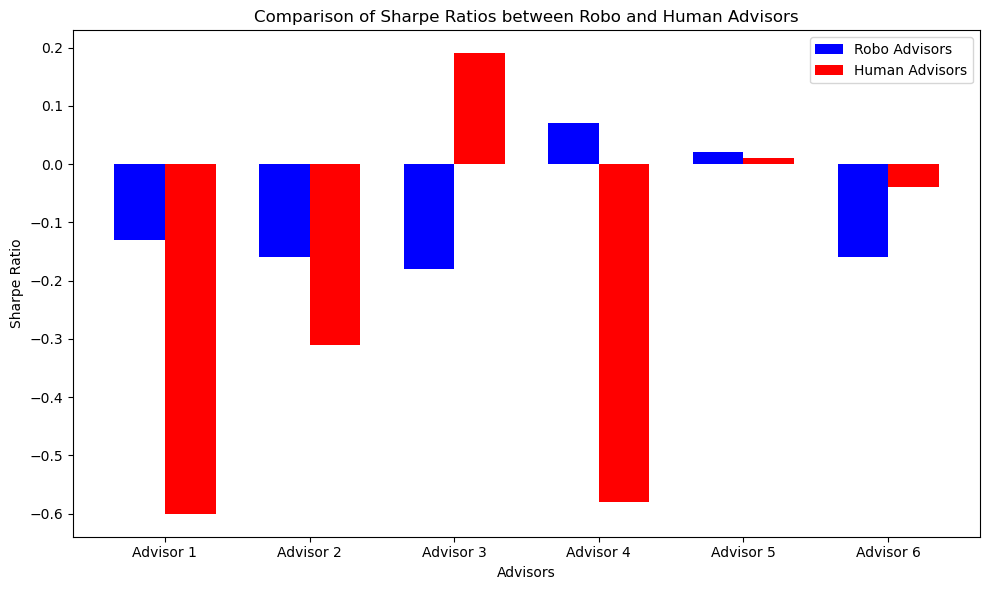

In [1]:
#Hardcoded analysis from datasets
#Sharpe Ratios
import matplotlib.pyplot as plt
import numpy as np

robo_sharpe = [-0.13, -0.16, -0.18, 0.07, 0.02, -0.16]
human_sharpe = [-0.60, -0.31, 0.19, -0.58, 0.01, -0.04]

labels = ['Advisor 1', 'Advisor 2', 'Advisor 3', 'Advisor 4', 'Advisor 5', 'Advisor 6']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, robo_sharpe, width, label='Robo Advisors', color='b')
bars2 = ax.bar(x + width/2, human_sharpe, width, label='Human Advisors', color='r')

ax.set_xlabel('Advisors')
ax.set_ylabel('Sharpe Ratio')
ax.set_title('Comparison of Sharpe Ratios between Robo and Human Advisors')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

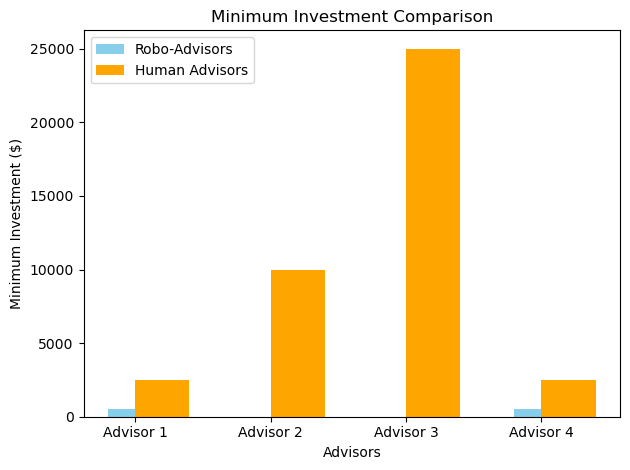

In [2]:
#Hardcoded analysis from datasets
#Minimum Investment
import matplotlib.pyplot as plt

robo_min_investments = [500, 5, 0, 500]
human_min_investments = [2500, 10000, 25000, 2500]
labels = ['Advisor 1', 'Advisor 2', 'Advisor 3', 'Advisor 4',]

x = range(len(labels))
plt.bar(x, robo_min_investments, width=0.4, label='Robo-Advisors', color='skyblue', align='center')
plt.bar(x, human_min_investments, width=0.4, label='Human Advisors', color='orange', align='edge')
plt.xlabel('Advisors')
plt.ylabel('Minimum Investment ($)')
plt.title('Minimum Investment Comparison')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()

Mean Squared Error: 0.16374867660292663


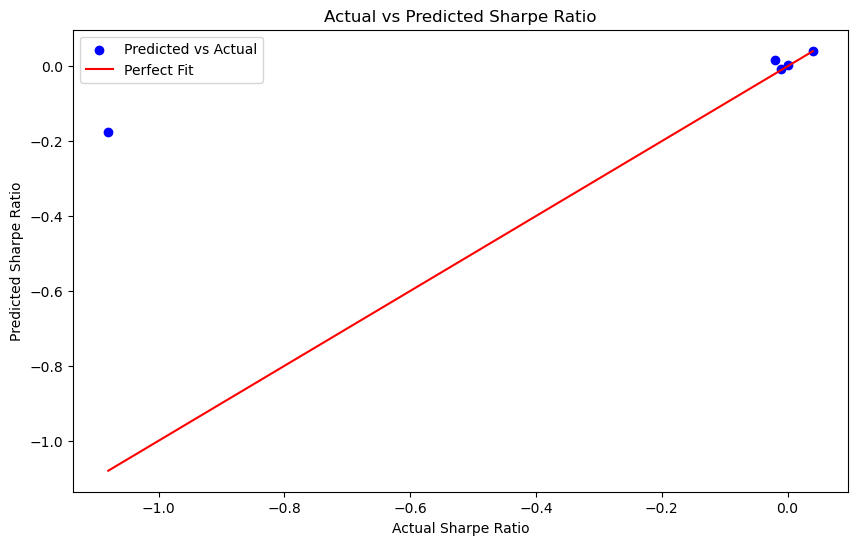

In [3]:
#Hardcoded analysis from datasets
#Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = {
    'Robo Name':['Acorns', 'Ally Invest Robo Portfolios', 'Betterment', 'E*Trade Core', 'Fidelity Go', 
                  'Merrill Guided Investing', 'Empower (Personal Capital)', 'Schwab Intelligent Portfolios', 
                  'SigFig', 'SoFi', 'US Bank Automated Investor', 'Vanguard Digital and Personal Advisor', 
                  'Wealthfront (Risk 4.0 ; 2016)', 'Wells Fargo Intuitive Investor'] ,
    'Sharpe Ratio': [-1.08, -0.13, -0.13, -0.16, 0.07, -0.01, -0.05, -0.14, -0.13, -0.02, -0.12, 0, 0.04, -0.16],
    '3-Year Annualized Return': [1.08, 1.59, 1.50, 1.29, 3.77, 2.95, 2.37, 1.68, 1.62, 3.21, 1.76, 3.08, 3.50, 1.08],
    'Minimum Investment': [0, 100, 0, 500, 0, 1000, 100000, 5000, 2000, 1, 1000, 3000, 500, 500]
}

df = pd.DataFrame(data)

X = df[['3-Year Annualized Return', 'Minimum Investment']]  #Features
y = df['Sharpe Ratio']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')
plt.xlabel('Actual Sharpe Ratio')
plt.ylabel('Predicted Sharpe Ratio')
plt.title('Actual vs Predicted Sharpe Ratio')
plt.legend()
plt.show()

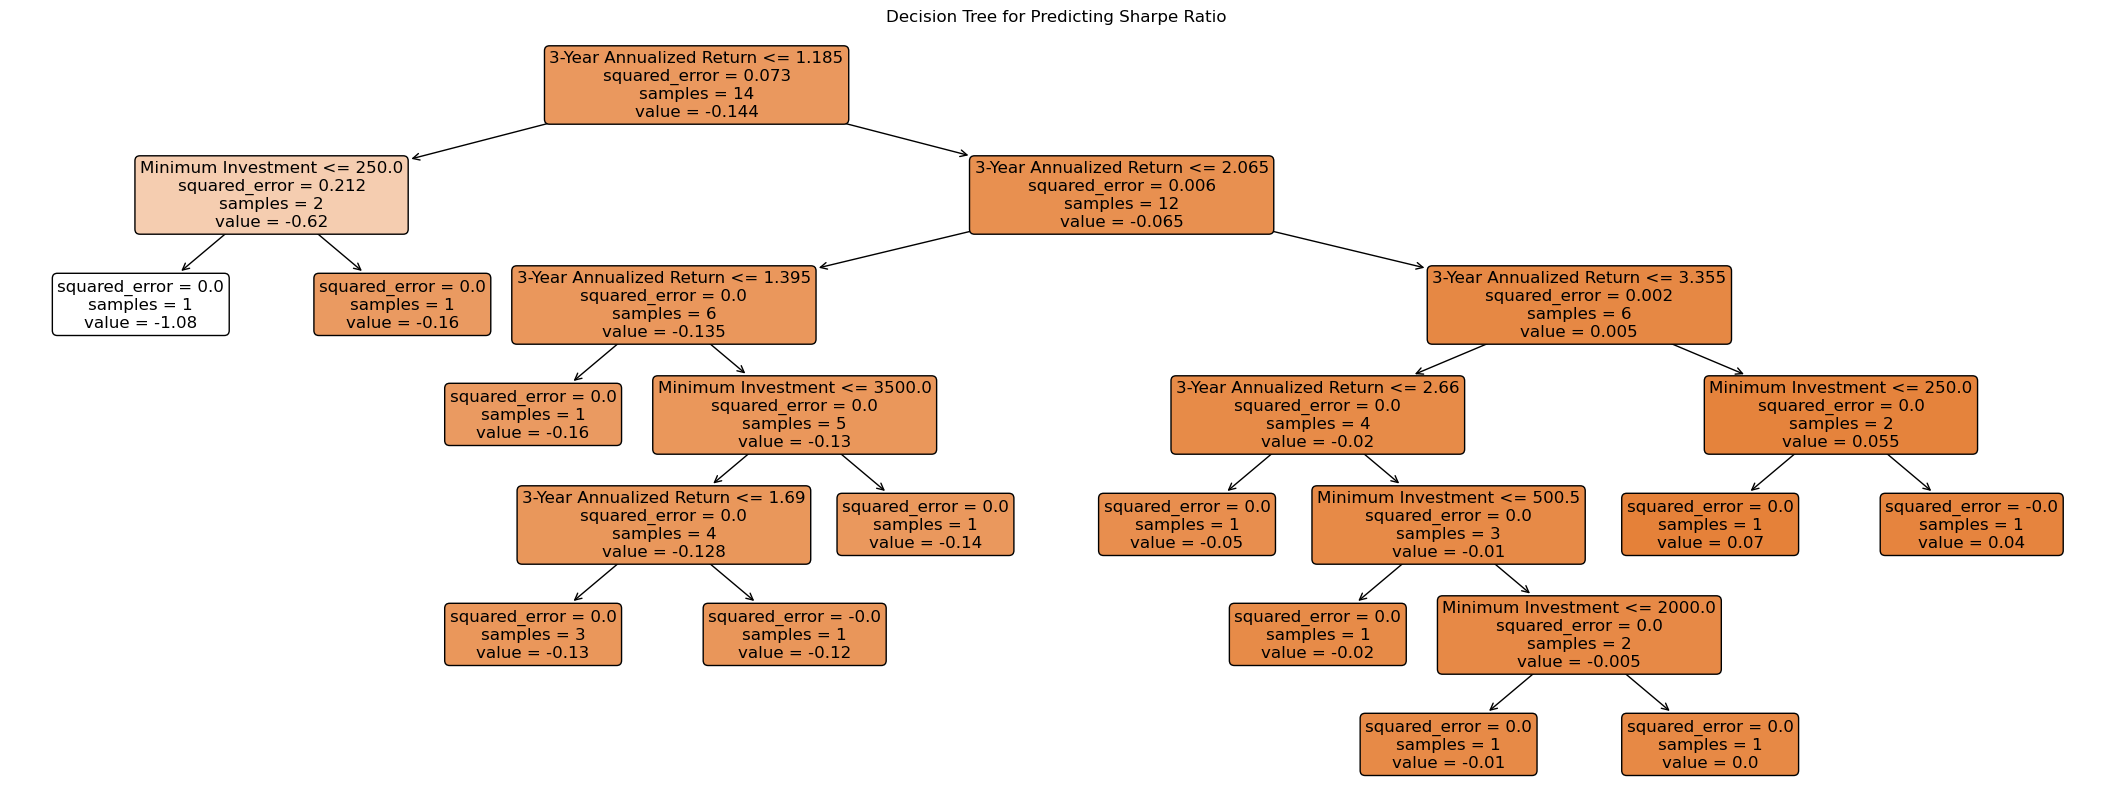

In [4]:
#Decision Tree

from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

X = df[['3-Year Annualized Return', 'Minimum Investment']]  #Features
y = df['Sharpe Ratio']  #Target

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X, y)

plt.figure(figsize=(27, 10))
plot_tree(tree_model, 
          feature_names=['3-Year Annualized Return', 'Minimum Investment'], 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title('Decision Tree for Predicting Sharpe Ratio')
plt.show()

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

X = df[['3-Year Annualized Return', 'Minimum Investment']]  #Features
y = df['Sharpe Ratio']  #Target

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X, y)

predictions = gb_model.predict(X)
print(predictions[:10])

[-1.07969519 -0.12994002 -0.13026407 -0.1599449   0.06991243 -0.01013699
 -0.05004137 -0.13983323 -0.12995726 -0.01980468]


In [6]:
from sklearn.neighbors import KNeighborsRegressor

X = df[['3-Year Annualized Return', 'Minimum Investment']]  #Features
y = df['Sharpe Ratio']  #Target

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X, y)

predictions = knn_model.predict(X)
print(predictions[:10])

[-0.258 -0.258 -0.258 -0.086 -0.258 -0.082 -0.066 -0.08  -0.084 -0.258]


In [7]:
#Hardcoded analysis from datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

data = {
    'Expense_Ratio': [0.06, 0.05, 0.04, 0.00, 0.06, 0.14, 0.50, 1.76, 1.17, 0.54, 1.79, 1.25],
    'Ranking_Score': [65.94, 62.70, 50.49, 81.53, 78.63, 59.67, 11, 93, 85, 14, 61, 79],
    'YTD_Performance': [4.97, 5.85, 5.95, 6.89, 7.87, 6.75, -0.66, 0.86, 15.29, 4.12, 4.64, 7.53],
    'Type': ['Robo']*6 + ['Human']*6
}
df = pd.DataFrame(data)

df['Type'] = df['Type'].apply(lambda x: 1 if x == 'Robo' else 0)

X = df[['Expense_Ratio', 'Ranking_Score', 'Type']]
y = df['YTD_Performance']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        YTD_Performance   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     1.707
Date:                Fri, 13 Dec 2024   Prob (F-statistic):              0.242
Time:                        19:19:57   Log-Likelihood:                -29.979
No. Observations:                  12   AIC:                             67.96
Df Residuals:                       8   BIC:                             69.90
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.3495      3.650      1.192

/Users/tapasyadhobley/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
